In [375]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [376]:
df = pd.read_csv("breast cancer diagnosis .csv")

In [377]:
print(df.head(3))

   Start Age  End Age menopause  Start tumor size  End tumor size  \
0         40       49   premeno                15              19   
1         50       59      ge40                15              19   
2         50       59      ge40                35              39   

   Start_env_nodes  end_env_nodes node-caps  deg-malig breast breast-quad  \
0                0              2       yes          3  right     left_up   
1                0              2        no          1  right     central   
2                0              2        no          2   left    left_low   

  irradiat                 Class  
0       no     recurrence-events  
1       no  no-recurrence-events  
2       no     recurrence-events  


In [378]:
df.replace("?", float("nan"), inplace=True)

# Check for missing values
print(df.isnull().sum())

Start Age           0
End Age             0
menopause           0
Start tumor size    0
End tumor size      0
Start_env_nodes     0
end_env_nodes       0
node-caps           8
deg-malig           0
breast              0
breast-quad         1
irradiat            0
Class               0
dtype: int64


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Start Age         286 non-null    int64 
 1   End Age           286 non-null    int64 
 2   menopause         286 non-null    object
 3   Start tumor size  286 non-null    int64 
 4   End tumor size    286 non-null    int64 
 5   Start_env_nodes   286 non-null    int64 
 6   end_env_nodes     286 non-null    int64 
 7   node-caps         278 non-null    object
 8   deg-malig         286 non-null    int64 
 9   breast            286 non-null    object
 10  breast-quad       285 non-null    object
 11  irradiat          286 non-null    object
 12  Class             286 non-null    object
dtypes: int64(7), object(6)
memory usage: 29.2+ KB


In [380]:
# Select the categorical attributes to encode
categorical_attributes = [ "menopause",  "node-caps","breast","breast-quad","irradiat","Class"]
encoded_values = {}
# Perform label encoding for each categorical attribute
label_encoder = LabelEncoder()
for attribute in categorical_attributes:
    df[attribute] = label_encoder.fit_transform(df[attribute].astype(str))
    encoded_values[attribute] = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Check the updated dataframe
print(df.head())

   Start Age  End Age  menopause  Start tumor size  End tumor size  \
0         40       49          2                15              19   
1         50       59          0                15              19   
2         50       59          0                35              39   
3         40       49          2                35              39   
4         40       49          2                30              34   

   Start_env_nodes  end_env_nodes  node-caps  deg-malig  breast  breast-quad  \
0                0              2          2          3       1            2   
1                0              2          1          1       1            0   
2                0              2          1          2       0            1   
3                0              2          2          3       1            1   
4                3              5          2          2       0            5   

   irradiat  Class  
0         0      1  
1         0      0  
2         0      1  
3         1   

In [381]:
for attribute, values in encoded_values.items():
    print(f"Encoded values for attribute '{attribute}':")
    for encoded_value, original_value in values.items():
        print(f"{original_value}: {encoded_value}")
    print()

Encoded values for attribute 'menopause':
ge40: 0
lt40: 1
premeno: 2

Encoded values for attribute 'node-caps':
nan: 0
no: 1
yes: 2

Encoded values for attribute 'breast':
left: 0
right: 1

Encoded values for attribute 'breast-quad':
central: 0
left_low: 1
left_up: 2
nan: 3
right_low: 4
right_up: 5

Encoded values for attribute 'irradiat':
no: 0
yes: 1

Encoded values for attribute 'Class':
no-recurrence-events: 0
recurrence-events: 1



In [382]:
X = df.drop("Class", axis=1).values
y = df["Class"].values


In [383]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (228, 12)
y_train shape: (228,)
X_test shape: (58, 12)
y_test shape: (58,)


In [396]:
print(y_train[2])

0


In [398]:
X_train[2]

array([40, 49,  2, 35, 39,  0,  2,  2,  3,  1,  1,  1], dtype=int64)

In [388]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# logistic regression model

In [392]:

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 81.03448275862068


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# logistic regession with KFold

In [393]:
from sklearn.model_selection import KFold
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize a list to store the evaluation scores
scores = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Initialize the model
    model = LogisticRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy score
    scores.append(accuracy)

# Calculate the average score
average_score = sum(scores) / len(scores)
print("Average Accuracy:", average_score*100)

Average Accuracy: 70.66545674531154


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# Random forest with Logistic regression 

In [394]:
import numpy as np
import joblib
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Generate predictions from both models
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Combine predictions as input to the meta-model
stacked_X = np.column_stack((rf_predictions, lr_predictions))

# Train the meta-model (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(stacked_X, y_test)

# Generate final predictions using the meta-model
meta_predictions = meta_model.predict(stacked_X)

# Calculate accuracy of the final predictions
accuracy = accuracy_score(y_test, meta_predictions)
print("Accuracy:", accuracy*100)
# Save the model
joblib.dump(model, 'RandomForest_Logisticregression.pkl')
# Load the model
loaded_model = joblib.load('RandomForest_Logisticregression.pkl')

# Make predictions
predictions = loaded_model.predict(X_train[1].reshape(1,-1))
print(predictions)


Accuracy: 98.27586206896551
[0]


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# LogisticRegression with AdaBoostClassifier

In [352]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy*100)

Logistic Regression Accuracy: 0.82
AdaBoost Accuracy: 0.88
SVM Accuracy: 84.5


In [353]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 86.0


In [354]:
# Create the Logistic Regression model
lr_model = LogisticRegression()

# Create the AdaBoost classifier with Logistic Regression as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=lr_model)

# Fit the AdaBoost classifier on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions using the combined model
predictions = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100)


Accuracy: 82.5


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [355]:
from sklearn.ensemble import StackingClassifier

# LogisticRegression with SVM

In [356]:
# Create the base models
logistic_model = LogisticRegression()
svm_model = SVC()

# Create the Stacking classifier
estimators = [('logistic', logistic_model), ('svm', svm_model)]
stacking_model = StackingClassifier(estimators=estimators)

# Fit the Stacking classifier on the training data
stacking_model.fit(X_train, y_train)

# Make predictions using the combined model
predictions = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100)

Accuracy: 84.0


# LogisticRegression ,RandomForestClassifier with GaussianNB

In [357]:
# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit individual models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each model
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model), ('naive_bayes', nb_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy*100)

85.0


# RandomForestClassifier with GaussianNB

In [358]:
# Step 2: Fit random forest and naive Bayes classifiers
rf_model = RandomForestClassifier()
nb_model = GaussianNB()

rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
rf_predictions = rf_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('random_forest', rf_model), ('naive_bayes', nb_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of the combined model
rf_accuracy = accuracy_score(y_test, rf_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy*100)

84.0


In [359]:
# Create the base models
logistic_model = LogisticRegression()
naive_bayes_model = GaussianNB()

# Create the Voting classifier
estimators = [('logistic', logistic_model), ('naive_bayes', naive_bayes_model)]
voting_model = VotingClassifier(estimators=estimators)

# Fit the Voting classifier on the training data
voting_model.fit(X_train, y_train)

# Make predictions using the combined model
predictions = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.83


# LogisticRegression, RandomForestClassifier with DecisionTreeClassifier

In [360]:
# Step 2: Fit logistic regression, random forest, and decision tree classifiers
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model), ('decision_tree', dt_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy*100)

87.5


# LogisticRegression, RandomForestClassifier, DecisionTreeClassifier with svm_model

In [361]:
# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit logistic regression, random forest, decision tree, and SVM classifiers
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model), ('decision_tree', dt_model), ('svm', svm_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy*100)

85.0


In [362]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the individual classifiers
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

# Step 3: Fit the classifiers on the training data
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Step 4: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Step 5: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model),
                ('decision_tree', dt_model), ('naive_bayes', nb_model),
                ('knn', knn_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 6: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.855


In [363]:
from sklearn.cluster import KMeans
# Apply K-Means clustering on the training data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

# Get the cluster assignments for the training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Create new feature matrices with the original features and cluster assignments
X_train_new = np.column_stack((X_train, train_clusters))
X_test_new = np.column_stack((X_test, test_clusters))

# Create and train the Logistic Regression model with the new feature matrices
logistic_model = LogisticRegression()
logistic_model.fit(X_train_new, y_train)

# Make predictions using the combined model
predictions = logistic_model.predict(X_test_new)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Accuracy: 0.82


In [364]:
# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit logistic regression, random forest, decision tree, Naive Bayes, k-NN, and SVM models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model), ('decision_tree', dt_model),
                ('naive_bayes', nb_model), ('knn', knn_model), ('svm', svm_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.845


In [365]:
# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit logistic regression, random forest, Naive Bayes, k-NN, and SVM models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model),
                ('naive_bayes', nb_model), ('knn', knn_model), ('svm', svm_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.84


In [366]:

# Step 1: Split the dataset into training and test sets
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit random forest, decision tree, Naive Bayes, k-NN, and SVM models
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('random_forest', rf_model),
                ('decision_tree', dt_model), ('naive_bayes', nb_model),
                ('knn', knn_model), ('svm', svm_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.855


In [367]:
# Apply K-Means clustering on the training data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

# Get the cluster assignments for the training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Create new feature matrices with the original features and cluster assignments
X_train_new = np.column_stack((X_train, train_clusters))
X_test_new = np.column_stack((X_test, test_clusters))

# Create and train the Naive Bayes model with the new feature matrices
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_new, y_train)

# Make predictions using the combined model
predictions = naive_bayes_model.predict(X_test_new)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Accuracy: 0.82


In [368]:
# Apply K-Means clustering on the training data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

# Get the cluster assignments for the training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Create new feature matrices with the original features and cluster assignments
X_train_new = np.column_stack((X_train, train_clusters))
X_test_new = np.column_stack((X_test, test_clusters))

# Create a Naive Bayes model as the weak classifier
naive_bayes = GaussianNB()

# Create an AdaBoost model with Naive Bayes as the base estimator
adaboost = AdaBoostClassifier(base_estimator=naive_bayes, n_estimators=50)

# Train the AdaBoost model on the new feature matrices
adaboost.fit(X_train_new, y_train)

# Make predictions using the combined model
predictions = adaboost.predict(X_test_new)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Accuracy: 0.805


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [369]:

from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


In [370]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


# RandomForestClassifier

In [371]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy *100)

Accuracy: 88.0


In [372]:
from sklearn.naive_bayes import GaussianNB
# Create the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.81


In [373]:
# Step 2: Fit logistic regression, random forest, decision tree, and Naive Bayes classifiers
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Step 3: Obtain predictions from each classifier
logistic_predictions = logistic_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

# Step 4: Combine predictions using VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('logistic', logistic_model), ('random_forest', rf_model), ('decision_tree', dt_model), ('naive_bayes', nb_model)],
    voting='hard'
)
voting_classifier.fit(X_train, y_train)
ensemble_predictions = voting_classifier.predict(X_test)

# Step 5: Evaluate the performance of each model and the combined model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(ensemble_accuracy)

0.85


In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten,concatenate,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape


# CNN-RNN hybrid

In [263]:
from tensorflow.keras.utils import to_categorical

# Convert y_train to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [264]:
# Define the hybrid CNN-RNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Reshape((128, 1)))  # Add a Reshape layer to convert to 3D
model.add(LSTM(128))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)
model.save('CNN-RNN_model.h5')

Epoch 1/100
31/31 [==============================] - 7s 132ms/step - loss: 0.6066 - accuracy: 0.6175
Epoch 2/100
31/31 [==============================] - 4s 130ms/step - loss: 0.4583 - accuracy: 0.8213
Epoch 3/100
31/31 [==============================] - 4s 129ms/step - loss: 0.3837 - accuracy: 0.8400
Epoch 4/100
31/31 [==============================] - 4s 130ms/step - loss: 0.3518 - accuracy: 0.8537
Epoch 5/100
31/31 [==============================] - 4s 131ms/step - loss: 0.4011 - accuracy: 0.8438
Epoch 6/100
31/31 [==============================] - 4s 128ms/step - loss: 0.3415 - accuracy: 0.8600
Epoch 7/100
31/31 [==============================] - 4s 131ms/step - loss: 0.3186 - accuracy: 0.8750
Epoch 8/100
31/31 [==============================] - 4s 130ms/step - loss: 0.3111 - accuracy: 0.8725
Epoch 9/100
31/31 [==============================] - 4s 132ms/step - loss: 0.2994 - accuracy: 0.8788
Epoch 10/100
31/31 [==============================] - 4s 132ms/step - loss: 0.3139 - accura

# CNN model

In [281]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=15)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)

# Predict on new data
predictions = model.predict(X_test)
model.save('CNNmodel.h5')

Epoch 1/150
54/54 [==============================] - 1s 2ms/step - loss: 0.5703 - accuracy: 0.7013
Epoch 2/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8150
Epoch 3/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8575
Epoch 4/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8800
Epoch 5/150
54/54 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8737
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8888
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8888
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.8963
Epoch 9/150
54/54 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.8950
Epoch 10/150
54/54 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8988
Epoch 11/

54/54 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 84/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 85/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 86/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 87/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 88/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 89/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 90/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 91/150
54/54 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 92/150
54/54 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 93/150


Epoch 1/150
54/54 [==============================] - 0s 4ms/step - loss: 2.8945e-04 - accuracy: 1.0000 - val_loss: 1.5800 - val_accuracy: 0.8400
Epoch 2/150
54/54 [==============================] - 0s 3ms/step - loss: 2.7681e-04 - accuracy: 1.0000 - val_loss: 1.5948 - val_accuracy: 0.8400
Epoch 3/150
54/54 [==============================] - 0s 3ms/step - loss: 2.6486e-04 - accuracy: 1.0000 - val_loss: 1.6067 - val_accuracy: 0.8400
Epoch 4/150
54/54 [==============================] - 0s 3ms/step - loss: 2.5016e-04 - accuracy: 1.0000 - val_loss: 1.6066 - val_accuracy: 0.8400
Epoch 5/150
54/54 [==============================] - 0s 3ms/step - loss: 2.4763e-04 - accuracy: 1.0000 - val_loss: 1.6193 - val_accuracy: 0.8400
Epoch 6/150
54/54 [==============================] - 0s 3ms/step - loss: 2.3747e-04 - accuracy: 1.0000 - val_loss: 1.6528 - val_accuracy: 0.8450
Epoch 7/150
54/54 [==============================] - 0s 3ms/step - loss: 2.3388e-04 - accuracy: 1.0000 - val_loss: 1.6376 - val_ac

54/54 [==============================] - 0s 3ms/step - loss: 7.0349e-06 - accuracy: 1.0000 - val_loss: 2.2624 - val_accuracy: 0.8450
Epoch 114/150
54/54 [==============================] - 0s 3ms/step - loss: 6.6488e-06 - accuracy: 1.0000 - val_loss: 2.2802 - val_accuracy: 0.8450
Epoch 115/150
54/54 [==============================] - 0s 3ms/step - loss: 6.4997e-06 - accuracy: 1.0000 - val_loss: 2.2739 - val_accuracy: 0.8450
Epoch 116/150
54/54 [==============================] - 0s 3ms/step - loss: 6.2265e-06 - accuracy: 1.0000 - val_loss: 2.2529 - val_accuracy: 0.8400
Epoch 117/150
54/54 [==============================] - 0s 3ms/step - loss: 6.3648e-06 - accuracy: 1.0000 - val_loss: 2.3126 - val_accuracy: 0.8450
Epoch 118/150
54/54 [==============================] - 0s 3ms/step - loss: 6.2428e-06 - accuracy: 1.0000 - val_loss: 2.2973 - val_accuracy: 0.8400
Epoch 119/150
54/54 [==============================] - 0s 3ms/step - loss: 6.0105e-06 - accuracy: 1.0000 - val_loss: 2.2784 - val_ac

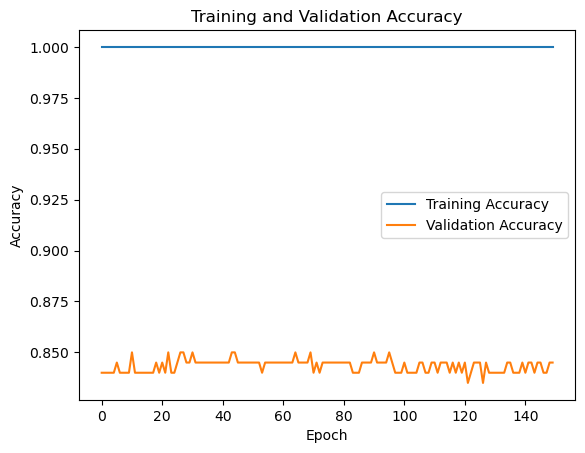

In [266]:
import matplotlib.pyplot as plt

# Train the model and collect the history
history = model.fit(X_train, y_train, epochs=150, batch_size=15, validation_data=(X_test, y_test))

# Get the accuracy scores
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy scores
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# RNN

In [267]:
# Create the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data to include the time step dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26)
model.save('RNNmodel.h5')

Epoch 1/100
31/31 [==============================] - 2s 8ms/step - loss: 0.6629 - accuracy: 0.6450
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 0.5818 - accuracy: 0.6900
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5430 - accuracy: 0.7237
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5277 - accuracy: 0.7362
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5203 - accuracy: 0.7538
Epoch 6/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5121 - accuracy: 0.7513
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7550
Epoch 8/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4994 - accuracy: 0.7575
Epoch 9/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4932 - accuracy: 0.7700
Epoch 10/100
31/31 [==============================] - 0s 7ms/step - loss: 0.4924 - accuracy: 0.7638
Epoch 11/

31/31 [==============================] - 0s 7ms/step - loss: 0.2461 - accuracy: 0.8938
Epoch 84/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2475 - accuracy: 0.8913
Epoch 85/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2412 - accuracy: 0.8900
Epoch 86/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2530 - accuracy: 0.8888
Epoch 87/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2504 - accuracy: 0.8825
Epoch 88/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2497 - accuracy: 0.8875
Epoch 89/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2524 - accuracy: 0.8850
Epoch 90/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2427 - accuracy: 0.8950
Epoch 91/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2384 - accuracy: 0.8975
Epoch 92/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2338 - accuracy: 0.8963
Epoch 93/100


In [282]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)

# Predict on new data
predictions = model.predict(X_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.8396 - accuracy: 0.8150
Test Loss: 1.8396204710006714
Test Accuracy: 81.49999976158142
7/7 [==============================] - 0s 2ms/step


# CNN

In [283]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)

# Predict on new data
predictions = model.predict(X_test)

Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6625
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.8112
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8537
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8662
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8700
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8725
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8687
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8737
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8712
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8725
Epoch 11/

31/31 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9087
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9087
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9100
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9087
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9137
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9100
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2080 - accuracy: 0.9125
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.9137
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9112
Epoch 92/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9137
Epoch 93/100


## ANN and CNN combined 

In [284]:
from tensorflow.keras.models import Sequential, Model

# Create the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Combine the ANN and CNN models
combined_input = concatenate([ann_model.output, cnn_model.output])
combined_output = Dense(128, activation='relu')(combined_input)
combined_output = Dense(2, activation='softmax')(combined_output)

# Create the final model
combined_model = Model(inputs=[ann_model.input, cnn_model.input], outputs=combined_output)

# Compile the model
combined_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
combined_model.fit([X_train, X_train[..., None]], y_train, epochs=100, batch_size=26)

# Evaluate the model
loss, accuracy = combined_model.evaluate([X_test, X_test[..., None]], y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy*100)
model.save('ANN-CNN-model.h5')

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8487
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8600
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8925
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.8863
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2743 - accuracy: 0.8875
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.8913
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.8863
Epoch 8/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.8963
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.8950
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.8975
Epoch 11/

31/31 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 84/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 85/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 86/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 87/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 88/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 89/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 90/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 91/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 92/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 93/100


# DNN model

In [285]:
# Create the DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)
model.save('DNN-model.h5')

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 0.5179 - accuracy: 0.7663
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8712
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8687
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8737
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.8863
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.8800
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8900
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.9013
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8925
Epoch 10/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8963
Epoch 11/

31/31 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9962
Epoch 84/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9900
Epoch 85/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9962
Epoch 86/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 87/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9962
Epoch 88/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9925
Epoch 89/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 90/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9900
Epoch 91/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 92/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 93/100


In [286]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# ANN -DNN model

In [287]:
# Create the hybrid model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Define the optimizer with adjusted learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)


Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.7993 - accuracy: 0.5250 - val_loss: 0.5881 - val_accuracy: 0.7063
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.6797 - val_loss: 0.4615 - val_accuracy: 0.8313
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4716 - accuracy: 0.7859 - val_loss: 0.4108 - val_accuracy: 0.8500
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8125 - val_loss: 0.3863 - val_accuracy: 0.8562
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8625 - val_loss: 0.3740 - val_accuracy: 0.8562
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.8531 - val_loss: 0.3675 - val_accuracy: 0.8625
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3607 - accuracy: 0.8547 - val_loss: 0.3617 - val_accuracy: 0.8625
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8891 - val_loss: 0.3374 - val_accuracy: 0.8562
Epoch 60/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.8906 - val_loss: 0.3432 - val_accuracy: 0.8562
Epoch 61/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.8844 - val_loss: 0.3461 - val_accuracy: 0.8500
Epoch 62/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.9000 - val_loss: 0.3379 - val_accuracy: 0.8500
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2560 - accuracy: 0.8781 - val_loss: 0.3452 - val_accuracy: 0.8500
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2744 - accuracy: 0.8875 - val_loss: 0.3434 - val_accuracy: 0.8500
Epoch 65/100
40/40 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.8938 - val_loss: 0.3443 - val_accuracy: 0.8500
Epoch 

# RNN-DNN model

In [288]:
# Create the hybrid model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Define the optimizer with adjusted learning rate
optimizer = Adam(learning_rate=0.001)

# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)
model.save('RNN-DNNmodel.h5')

Epoch 1/100
25/25 [==============================] - 3s 30ms/step - loss: 0.6999 - accuracy: 0.4953 - val_loss: 0.6824 - val_accuracy: 0.5875
Epoch 2/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6801 - accuracy: 0.5859 - val_loss: 0.6761 - val_accuracy: 0.6000
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6655 - accuracy: 0.5797 - val_loss: 0.6721 - val_accuracy: 0.6187
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6646 - accuracy: 0.5984 - val_loss: 0.6592 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6433 - accuracy: 0.6375 - val_loss: 0.6316 - val_accuracy: 0.6625
Epoch 6/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6031 - accuracy: 0.6656 - val_loss: 0.5993 - val_accuracy: 0.7000
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 0.5668 - accuracy: 0.6938 - val_loss: 0.5810 - val_accuracy: 0.7125
Epoch 

# CNN-DNN model

In [289]:
# Create the hybrid model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

# Define the optimizer with adjusted learning rate
optimizer = Adam(learning_rate=0.003)

# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=26, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy*100)
model.save('CNN-DNN.h5')

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6308 - accuracy: 0.6359 - val_loss: 0.4863 - val_accuracy: 0.7937
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5095 - accuracy: 0.7578 - val_loss: 0.4530 - val_accuracy: 0.8125
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4704 - accuracy: 0.7953 - val_loss: 0.4240 - val_accuracy: 0.8250
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8156 - val_loss: 0.4029 - val_accuracy: 0.8250
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4227 - accuracy: 0.8078 - val_loss: 0.3853 - val_accuracy: 0.8438
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8281 - val_loss: 0.3667 - val_accuracy: 0.8438
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.8438 - val_loss: 0.3611 - val_accuracy: 0.8313
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.8828 - val_loss: 0.3590 - val_accuracy: 0.8438
Epoch 60/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2576 - accuracy: 0.8922 - val_loss: 0.3676 - val_accuracy: 0.8562
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 0.9016 - val_loss: 0.3751 - val_accuracy: 0.8562
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.8891 - val_loss: 0.3647 - val_accuracy: 0.8625
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.8938 - val_loss: 0.3680 - val_accuracy: 0.8500
Epoch 64/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2651 - accuracy: 0.8938 - val_loss: 0.3529 - val_accuracy: 0.8562
Epoch 65/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.8922 - val_loss: 0.3631 - val_accuracy: 0.8625
Epoch 

Encoded values for attribute 'menopause':
ge40: 0
lt40: 1
premeno: 2

Encoded values for attribute 'node-caps':
nan: 0
no: 1
yes: 2

Encoded values for attribute 'breast':
left: 0
right: 1

Encoded values for attribute 'breast-quad':
central: 0
left_low: 1
left_up: 2
nan: 3
right_low: 4
right_up: 5

Encoded values for attribute 'irradiat':
no: 0
yes: 1

Encoded values for attribute 'Class':
no-recurrence-events: 0
recurrence-events: 1

In [290]:
data=X_train[1]
data.shape

(10, 1)

In [291]:
import numpy as np
from tensorflow.keras.models import load_model

In [292]:
model = load_model('CNN-DNN.h5')

# Compile the model (if needed)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [296]:
data.shape

(10, 1)

In [293]:
print(model.input_shape)

(None, 10, 1)


In [295]:
predictions = model.predict(data)

# Convert predictions to labels
labels = np.argmax(predictions, axis=1)

ValueError: in user code:

    File "C:\Users\Megha\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Megha\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Megha\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Megha\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Megha\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer 'conv1d_9' (type Conv1D).
    
    Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_18/conv1d_9/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_18/conv1d_9/Conv1D/ExpandDims, sequential_18/conv1d_9/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,1], [1,3,1,32].
    
    Call arguments received by layer 'conv1d_9' (type Conv1D):
      • inputs=tf.Tensor(shape=(None, 1, 1), dtype=float32)
